In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score


## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [2]:
heart = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
heart['cp'] = heart['cp'].astype('category')
heart['sex'] = heart['sex'].astype('category')
heart['restecg'] = heart['restecg'].astype('category')
heart.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [3]:
X = heart[["age","chol"]]
y = heart["diagnosis"]

In [4]:
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
         make_column_selector(dtype_include=['category', 'object']))      
    ],
    remainder="passthrough"
)


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [7]:
#Logistic Regression

log_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("logistic_regression", LogisticRegression())
    ]
)

#Fit on data
log_pipeline_fitted = log_pipeline.fit(X,y)

log_intercept = log_pipeline_fitted.named_steps['logistic_regression'].intercept_[0]
log_age = log_pipeline_fitted.named_steps["logistic_regression"].coef_[0][0]
log_chol = log_pipeline_fitted.named_steps["logistic_regression"].coef_[0][1]
print(log_intercept)
print(log_age)
print(log_chol)


-3.2401122588589297
0.046863306130364435
0.0018012385190292537


In [37]:
zi = np.log(.9/.1)
zi

2.1972245773362196

zi = 0.04686age + .002chol - 3.24


0 = 0.04686age + .002chol - 3.24

In [38]:
#For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?
age55 = ((log_age*55)-log_intercept)/log_chol
print(f"Minimum cholesterol for doctor to determine heart disease is present = {age55}")

Minimum cholesterol for doctor to determine heart disease is present = 3229.7744216375436


In [45]:
#How high for the doctors to estimate a 90% chance that heart disease is present?
age90 = (zi - (log_age*55)-log_intercept)/log_chol
print(f"Minimum cholesterol for doctor to determine heart disease is present = {age90}")

Minimum cholesterol for doctor to determine heart disease is present = 1587.7158792753191


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [48]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("LDA", LinearDiscriminantAnalysis())
    ]
)

#Fit on data
lda_pipeline_fitted = lda_pipeline.fit(X,y)

lda_intercept = lda_pipeline_fitted.named_steps["LDA"].intercept_[0]
lda_age = lda_pipeline_fitted.named_steps["LDA"].coef_[0][0]
lda_chol = lda_pipeline_fitted.named_steps["LDA"].coef_[0][1]
print(lda_intercept)
print(lda_age)
print(lda_chol)

-3.2196776604068775
0.04655743553694482
0.0017896671039291307


In [49]:
#For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?
ldaage55 = ((lda_age*55)-lda_intercept)/lda_chol
print(f"Minimum cholesterol for doctor to determine heart disease is present = {ldaage55}")

Minimum cholesterol for doctor to determine heart disease is present = 3229.8390031578406


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [51]:
from sklearn.svm import SVC

svc_pipeline = Pipeline(
  [("preprocessing", ct),
  ("SVC", SVC(kernel = "linear"))]
)

svc_pipeline_fitted = svc_pipeline.fit(X,y)
svc_intercept = svc_pipeline_fitted.named_steps["SVC"].intercept_[0]
svc_age = svc_pipeline_fitted.named_steps["SVC"].coef_[0][0]
svc_chol = svc_pipeline_fitted.named_steps["SVC"].coef_[0][1]
print(svc_intercept)
print(svc_age)
print(svc_chol)

-4.686034055211244
0.06439772419707879
0.0036589616029232275


In [52]:
#For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?
svcage55 = ((svc_age*55)-svc_intercept)/svc_chol
print(f"Minimum cholesterol for doctor to determine heart disease is present = {svcage55}")

Minimum cholesterol for doctor to determine heart disease is present = 2248.7005273510154


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

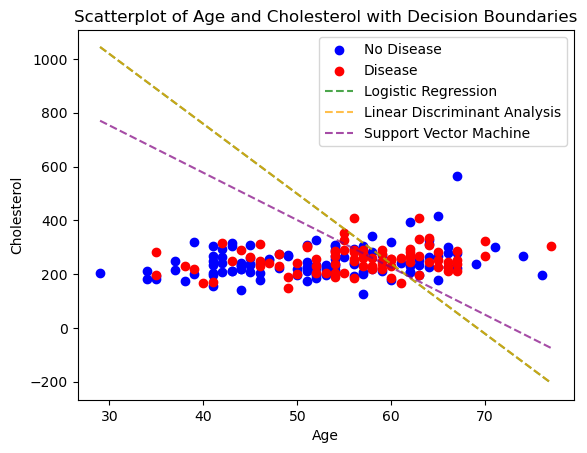

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert 'No Disease' to 0 and 'Disease' to 1
label_encoder = LabelEncoder()
heart['diagnosis'] = label_encoder.fit_transform(heart['diagnosis'])


plt.scatter(heart[heart['diagnosis'] == 0]['age'], heart[heart['diagnosis'] == 0]['chol'], label='No Disease', color='blue')
plt.scatter(heart[heart['diagnosis'] == 1]['age'], heart[heart['diagnosis'] == 1]['chol'], label='Disease', color='red')

# Decision boundary for log regression
x_lr = np.linspace(min(heart['age']), max(heart['age']), 100)
y_lr = (-log_intercept - log_age * x_lr) / log_chol
plt.plot(x_lr, y_lr, label='Logistic Regression', linestyle='--', color='green', alpha=0.7)

# Decision boundary for LDA
y_lda = (-lda_intercept - lda_age * x_lr) / lda_chol
plt.plot(x_lr, y_lda, label='Linear Discriminant Analysis', linestyle='--', color='orange', alpha=0.7)

# Decision boundary for SVC
y_svc = (-svc_intercept - svc_age * x_lr) / svc_chol
plt.plot(x_lr, y_svc, label='Support Vector Machine', linestyle='--', color='purple', alpha=0.7)

# Plot
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.title('Scatterplot of Age and Cholesterol with Decision Boundaries')
plt.show()
